> **1. Download the Dataset**  
> from google.colab import drive  
> drive.mount('/content/drive')
>
> Drive already mounted at /content/drive; to attempt to forcibly
> remount, call drive.mount("/content/drive", force_remount=True).
>
> import zipfile  
> from google.colab import drive
>
> drive.mount('/content/drive/')
>
> Drive already mounted at /content/drive/; to attempt to forcibly
> remount, call drive.mount("/content/drive/", force_remount=True).
>
> !unzip '/content/drive/MyDrive/Flowers-Dataset'
>
> unzip: cannot find or open /content/drive/MyDrive/Flowers-Dataset,
> /content/drive/MyDrive/Flowers-Dataset.zip or  
> /content/drive/MyDrive/Flowers-Dataset.ZIP.
>
> **2. Image Augmentation**  
> import numpy as np  
> import tensorflow as tf  
> from tensorflow.keras import layers  
> from tensorflow.keras.models import Sequential  
> from tensorflow.keras.preprocessing.image import ImageDataGenerator
> import matplotlib.pyplot as plt  
> batch_size =32  
> img_height =180  
> img_width =180  
> data_dir ="/content/drive/MyDrive/flowers"
>
> train_datagen = ImageDataGenerator(rescale =1./255, horizontal_flip =
> True, vertical_flip =True, zoom_range =0.2)
>
> x_train =  
> train_datagen.flow_from_directory('/content/drive/MyDrive/flowers',tar
> get_size=(64,64),  
> class_mode='categorical',batch_size=100)
>
> Found 4317 images belonging to 5 classes.
>
> **3. Create Model**  
> from tensorflow.keras.layers import
> Convolution2D,MaxPooling2D,Flatten,Dense model = Sequential()
>
> training_ds = tf.keras.utils.image_dataset_from_directory( data_dir,  
> validation_split=0.2,  
> subset="training",  
> seed=57,  
> image_size=(img_height, img_width),  
> batch_size=32)
>
> Found 4317 files belonging to 5 classes. Using 3454 files for
> training.
>
> validation_ds = tf.keras.utils.image_dataset_from_directory(
> data_dir,  
> validation_split=0.2,  
> subset="validation",  
> seed=107,  
> image_size=(img_height, img_width),  
> batch_size=batch_size)
>
> Found 4317 files belonging to 5 classes. Using 863 files for
> validation.
>
> training_ds.class_names
>
> \['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'\]
>
> plt.figure(figsize=(7, 7))  
> **for** data, labels **in** training_ds.take(1):  
> **for** i **in** range(6):  
> ax = plt.subplot(2, 3, i +1)  
> plt.imshow(data\[i\].numpy().astype("uint8"))
> plt.title(training_ds.class_names\[labels\[i\]\]) plt.axis("off")
>
> 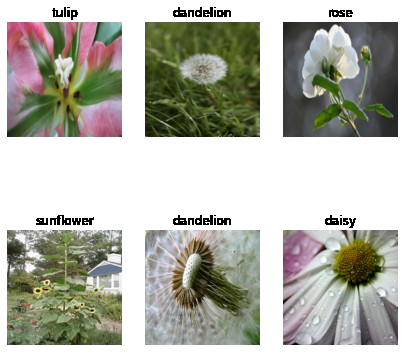
>
> **4. Add Layers**
>
> **4.1 Convolution layer**
>
> model.add(Convolution2D(32, (3,3), activation ="relu", input_shape =
> (64,64,3) ))
>
> **4.2 Maxpooling layer**
>
> model.add(MaxPooling2D(pool_size = (2,2)))
>
> **4.3 Flatten**
>
> model.add(Flatten())
>
> **4.4 Hidden/dense layers**
>
> model.add(Dense(300, activation ="relu")) model.add(Dense(150,
> activation ="relu"))
>
> **4.5 Output layer**
>
> model.add(Dense(5, activation ="softmax"))
>
> **5. Compiling Model**  
> model.compile(optimizer='adam',loss='categorical_crossentropy',metrics
> =\['accuracy'\])
>
> **6. Fit The Model**  
> model.fit(x_train, epochs =15, steps_per_epoch = len(x_train))
>
> Epoch 1/15  
> 44/44 \[==============================\] - 644s 14s/step - loss:
> 1.3148 - accuracy: 0.4378  
> Epoch 2/15  
> 44/44 \[==============================\] - 37s 826ms/step - loss:
> 1.1228- accuracy: 0.5365  
> Epoch 3/15  
> 44/44 \[==============================\] - 36s 816ms/step - loss:
> 1.0739- accuracy: 0.5698  
> Epoch 4/15  
> 44/44 \[==============================\] - 36s 820ms/step - loss:
> 1.0333- accuracy: 0.5884  
> Epoch 5/15  
> 44/44 \[==============================\] - 36s 821ms/step - loss:
> 0.9918- accuracy: 0.5937  
> Epoch 6/15  
> 44/44 \[==============================\] - 36s 815ms/step - loss:
> 0.9287- accuracy: 0.6363  
> Epoch 7/15  
> 44/44 \[==============================\] - 37s 824ms/step - loss:
> 0.9153- accuracy: 0.6456  
> Epoch 8/15  
> 44/44 \[==============================\] - 36s 823ms/step - loss:
> 0.8634- accuracy: 0.6602  
> Epoch 9/15  
> 44/44 \[==============================\] - 36s 819ms/step - loss:
> 0.8689- accuracy: 0.6637  
> Epoch 10/15  
> 44/44 \[==============================\] - 36s 823ms/step - loss:
> 0.8516- accuracy: 0.6762  
> Epoch 11/15  
> 44/44 \[==============================\] - 36s 819ms/step - loss:
> 0.8070- accuracy: 0.6868  
> Epoch 12/15  
> 44/44 \[==============================\] - 36s 814ms/step - loss:
> 0.7755- accuracy: 0.7044  
> Epoch 13/15  
> 44/44 \[==============================\] - 36s 820ms/step - loss:
> 0.7807- accuracy: 0.6991
>
> Epoch 14/15  
> 44/44 \[==============================\] - 36s 832ms/step - loss:
> 0.7506- accuracy: 0.7063  
> Epoch 15/15  
> 44/44 \[==============================\] - 36s 809ms/step - loss:
> 0.7401- accuracy: 0.7091
>
> \<keras.callbacks.History at 0x7fcc24bd1850\>
>
> **7. Save The Model**  
> model.save("flowers.h1")
>
> WARNING:absl:Found untraced functions such as  
> \_jit_compiled_convolution_op while saving (showing 1 of 1). These
> functions will not be directly callable after loading.
>
> **8. Test The Model**  
> from tensorflow.keras.models import load_model from
> tensorflow.keras.preprocessing import image
>
> model = load_model("/content/flowers.h1")
>
> daisy_img =  
> image.load_img('/content/drive/MyDrive/flowers/daisy/100080576_f52e8ee
> 070_n.jpg',target_size=(64,64))  
> x = image.img_to_array(daisy_img)  
> x = np.expand_dims(x,axis=0)  
> predicted_class=model.predict(x)
>
> 1/1 \[==============================\] - 0s 115ms/step
>
> labels = \['daisy','dandelion','roses','sunflowers','tulips'\]
> labels\[np.argmax(predicted_class)\]
>
> {"type":"string"}
>
> daisy_img
>
> 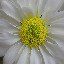